Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

Classification Models and estimators will be imported later on

Dataset from CreditOne

In [2]:
creditOne = pd.read_csv('file.csv', header=0)
creditOne.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Check the datatypes

In [3]:
creditOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
#transform categorical attributes

creditOne['SEX'] = creditOne['SEX'].astype('category')
creditOne['EDUCATION'] = creditOne['EDUCATION'].astype('category')
creditOne['MARRIAGE'] = creditOne['MARRIAGE'].astype('category')
creditOne['PAY_0'] = creditOne['PAY_0'].astype('category')
creditOne['PAY_2'] = creditOne['PAY_2'].astype('category')
creditOne['PAY_3'] = creditOne['PAY_3'].astype('category')
creditOne['PAY_4'] = creditOne['PAY_4'].astype('category')
creditOne['PAY_5'] = creditOne['PAY_5'].astype('category')
creditOne['PAY_6'] = creditOne['PAY_6'].astype('category')
creditOne['default payment next month'] = creditOne['default payment next month'].astype('category')

In [5]:
creditOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

Feature Engineering

Recursive feature elimination (Filter Method)

In [6]:
#Imports
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [9]:
#Select Features
features = creditOne.iloc[:,1:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [10]:
#dependent variable
depVar = creditOne['default payment next month']

In [22]:
#Training Set (Feature Space: X Training)
#70/30 proportion
X_train = (features[: 2100])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 22 columns):
LIMIT_BAL    2100 non-null int64
SEX          2100 non-null category
EDUCATION    2100 non-null category
MARRIAGE     2100 non-null category
AGE          2100 non-null int64
PAY_0        2100 non-null category
PAY_2        2100 non-null category
PAY_3        2100 non-null category
PAY_4        2100 non-null category
PAY_5        2100 non-null category
PAY_6        2100 non-null category
BILL_AMT1    2100 non-null int64
BILL_AMT2    2100 non-null int64
BILL_AMT3    2100 non-null int64
BILL_AMT4    2100 non-null int64
BILL_AMT5    2100 non-null int64
BILL_AMT6    2100 non-null int64
PAY_AMT1     2100 non-null int64
PAY_AMT2     2100 non-null int64
PAY_AMT3     2100 non-null int64
PAY_AMT4     2100 non-null int64
PAY_AMT5     2100 non-null int64
dtypes: category(9), int64(13)
memory usage: 234.9 KB


In [24]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 2100]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 2100


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [25]:
#Testing Set (X Testing)
X_test = features[-900:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 900
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
29100     320000   2         3        1   52    -2    -2    -2    -2    -2   
29101      80000   2         2        2   56     0     0     0     0     0   
29102     180000   2         2        1   58    -2    -2    -2    -2    -2   
29103      60000   2         2        2   51     0     0     0     0     0   
29104     440000   2         1        1   54     0     0     0     0     0   

       ... BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29100  ...      2080        218          0       2355          0      2080   
29101  ...     49533      49339      50415      45859      43152      2000   
29102  ...         0        750       1576       1504          0         0   
29103  ...     18251      19289      19033      20793      23530      2065   
29104  ...    254498     169622     169140     152404     138447      9700   



In [26]:
#Ground Truth (y_test) 
y_test = depVar[-900:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 900


29100    0
29101    0
29102    0
29103    0
29104    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [18]:
import seaborn as sns

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Num Features: 3
Selected Features: [False False False  True False  True False  True False False False False
 False False False False False False False False False False]
Feature Ranking: [12  5  6  1  7  1  4  1  2  3 19 16 13 14 11 20 18  8  9 15 10 17]


/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [33]:
#another RFE
from sklearn.linear_model import LinearRegression


model2 = LinearRegression()
#Initializing RFE model
rfe2 = RFE(model2, 7)
#Transforming data using RFE
X_rfe2 = rfe2.fit_transform(X_train,y_train)  
#Fitting the data to model
model2.fit(X_rfe2,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False False False  True False  True  True  True  True  True  True False
 False False False False False False False False False False]
[15  2  3  1  4  1  1  1  1  1  1  9 14 10  8  7 12  5  6 16 11 13]


In [36]:
cols = list(X_train.columns)


#Transforming data using RFE
X_rfe2 = rfe2.fit_transform(X_train,y_train)  
#Fitting the data to model
model2.fit(X_rfe2,y_train)              
temp = pd.Series(rfe2.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')


In [114]:
creditOne.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [131]:
#Select Features after RFE
features2 = creditOne.iloc[:2,6:12]
print('Summary of feature sample')
features2.head()
features2 = creditOne[['MARRIAGE','PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5','PAY_6']]
features2.head()

Summary of feature sample


,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,-1,-1,-2,-2
1,2,-1,2,0,0,0,2
2,2,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,-1,0,-1,0,0,0


In [132]:
#Training Set (Feature Space: X Training)
#70/30 proportion
X_train2 = (features2[: 2100])
X_train2.head()

,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,-1,-1,-2,-2
1,2,-1,2,0,0,0,2
2,2,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,-1,0,-1,0,0,0


In [133]:
#Dependent Variable Training Set (y Training)
y_train2 = depVar[: 2100]
y_train_count2 = len(y_train2.index)
print('The number of observations in the Y training set are:',str(y_train_count2))
y_train2.head()

The number of observations in the Y training set are: 2100


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [134]:
#Testing Set (X Testing)
X_test2 = features2[-900:]
X_test_count2 = len(X_test2.index)
print('The number of observations in the feature testing set is:',str(X_test_count2))
print(X_test2.head())

The number of observations in the feature testing set is: 900
      MARRIAGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
29100        1    -2    -2    -2    -2    -2    -2
29101        2     0     0     0     0     0     0
29102        1    -2    -2    -2    -2    -2    -2
29103        2     0     0     0     0     0     0
29104        1     0     0     0     0     0     0


In [135]:
#Ground Truth (y_test) 
y_test2 = depVar[-900:]
y_test_count2 = len(y_test2.index)
print('The number of observations in the Y training set are:',str(y_test_count2))
y_test2.head()

The number of observations in the Y training set are: 900


29100    0
29101    0
29102    0
29103    0
29104    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

Classification models

In [37]:
#Decision Tree
from sklearn import tree

In [58]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
round(DT.score(X_train,y_train), 4)

1.0

In [66]:
DT.predictions = DT.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, DT.predictions))

[[555 125]
 [144  76]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT.predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       680
           1       0.38      0.35      0.36       220

    accuracy                           0.70       900
   macro avg       0.59      0.58      0.58       900
weighted avg       0.69      0.70      0.70       900



In [48]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
round(RF.score(X_train,y_train), 4)

0.7952

In [83]:
RF.predictions = RF.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix 
cmRF = print(confusion_matrix(y_test, RF.predictions))

[[675   5]
 [189  31]]


/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


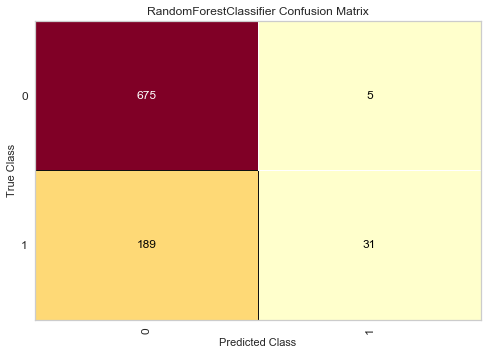

In [111]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix


# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(RF, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

In [91]:
from sklearn.metrics import classification_report
RF.classificationreport = print(classification_report(y_test, RF.predictions))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       680
           1       0.86      0.14      0.24       220

    accuracy                           0.78       900
   macro avg       0.82      0.57      0.56       900
weighted avg       0.80      0.78      0.72       900



/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


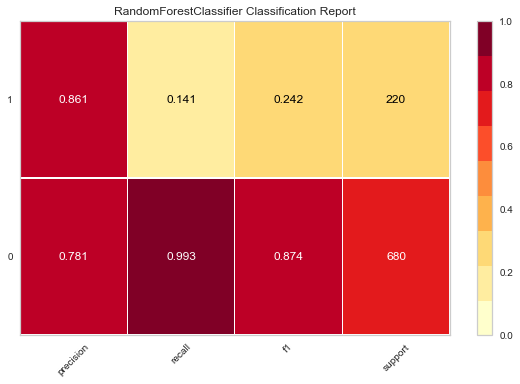

In [112]:

from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["0", "1"]

visualizer = ClassificationReport(RF, classes=classes, support=True)


visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

In [136]:
RF2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF2.fit(X_train2, y_train2)
round(RF2.score(X_train2,y_train2), 4)

0.7924

In [137]:
RF2.predictions = RF2.predict(X_test2)

In [138]:
cmRF2 = print(confusion_matrix(y_test2, RF2.predictions))

[[668  12]
 [181  39]]


/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


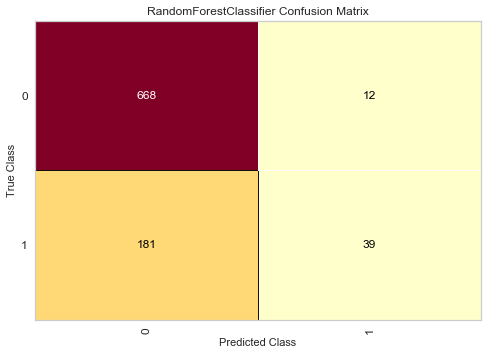

In [139]:
# The ConfusionMatrix visualizer taxes a model
cm2 = ConfusionMatrix(RF2, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train2, y_train2)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm2.score(X_test2, y_test2)

# How did we do?
cm2.show()

In [140]:
RF2.classificationreport = print(classification_report(y_test2, RF2.predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       680
           1       0.76      0.18      0.29       220

    accuracy                           0.79       900
   macro avg       0.78      0.58      0.58       900
weighted avg       0.78      0.79      0.73       900



/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValueError: Number of features of the model must match the input. Model n_features is 22 and input n_features is 7 

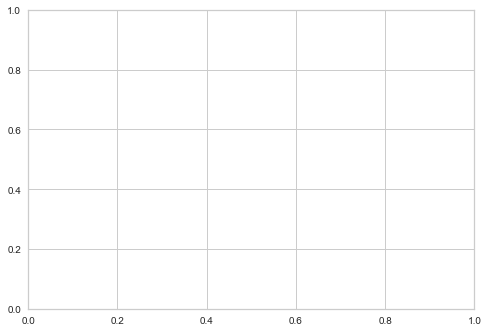

In [141]:
# Specify the target classes
classes = ["0", "1"]

visualizer2 = ClassificationReport(RF2, classes=classes, support=True)


visualizer.fit(X_train2, y_train2)  # Fit the visualizer and the model
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

In [61]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)

round(SVM.score(X_train,y_train), 4)

/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7814

In [81]:
SVM.predictions = SVM.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, SVM.predictions))

[[672   8]
 [218   2]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM.predictions))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       680
           1       0.20      0.01      0.02       220

    accuracy                           0.75       900
   macro avg       0.48      0.50      0.44       900
weighted avg       0.62      0.75      0.65       900



In [63]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
round(NN.score(X_train,y_train), 4)

0.7829

In [78]:
NN.predictions = NN.predict(X_test)


In [80]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, NN.predictions))

[[680   0]
 [220   0]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, NN.predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       680
           1       0.00      0.00      0.00       220

    accuracy                           0.76       900
   macro avg       0.38      0.50      0.43       900
weighted avg       0.57      0.76      0.65       900



/Users/NazarethLopez/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
from sklearn.metrics import accuracy_score

In [77]:
#n_features = 22

# Create different classifiers.
classifiers = {
    #'Decision Tree': tree.DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,
                                        max_depth=2,
                                        random_state=0),
    'Support Vector Machine': svm.LinearSVC(),
    'Neural Networks': MLPClassifier(solver='lbfgs', 
                                     alpha=1e-5, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1),
}


n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]



for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

Accuracy (train) for Random Forest: 78.4% 


ValueError: Number of features of the model must match the input. Model n_features is 22 and input n_features is 2 

<Figure size 432x432 with 0 Axes>

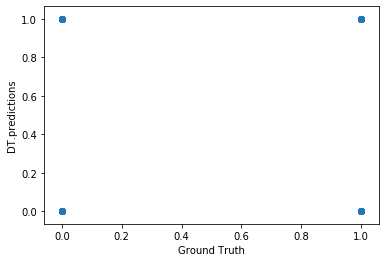

In [67]:
#Plotting Decision Tree Predictions
plt.scatter(y_test, DT.predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('DT.predictions')
plt.show()